## Startup task: Train and test a classification model #2

In this task I'm going to analyse the winequality.csv dataset. 
<br>This data contains characteristics of wines and its classification into recommended or not recommended.
I've applied Logistic Regression and Gradient Boosting models to get a binary classification, as shown below.

### Pre-processing

The data contains 13 features and 4898 rows. No missing data was found for all the examples and features and, all of them, except "recommend" and "quality" features, are continuous. The other two, "quality" and "recommend", are categorical features. 

The minimum and maximum values of each feature were obtained and, since each is varying in a different scale, I decided to apply a MinMaxScale.

### Models

**Logistic Regression** was choosen, as it is one of the most simple models for classification tasks. By starting with a simpler model, we can use it as a comparison with a more complex model and, in this analysis, quantify the difference between them, using their F1 score and accuracy. Depending on the application, the Logistic Regression can provide the necessary results, and a more complex model is not needed.

**Gradient Boosting Classifier** is a more complex method that combines Random Forest and Logistic Regression. I want to compare its result with Logistic Regression and evaluate if, for this case, this dataset requires a more complex model, such as Gradient Boosting.

### What I've done

1- Checking for missing values: no missing value was found.
<br>2- Plotting a heatmap: a high correlation between quality and alcohol to recommend feauture was found, and low correlation between the other features and recommend. This indicates that the models might learn mostly from these two features.
<br>3- Plotting a boxplot: the boxplot confirms the high relation of "quality" and "alcohol" to "recommend". The values of "quality" are deslocated and it can be seen that a higher value of "quality" is related to a "recommend" classification equals True. I've decided to drop the feature "quality" in order to evaluate better the influence of the parameters.
<br>4- Scaling the data: it was observed a different scale for each feature. A MinMaxScale method was applied.
<br>5- Splitting the data: the dataset was splitted into train and test in two different ways: using 5% of the examples for the test set and 95% for the train, and using Kfolds, with a number of splits equal to 5. 
<br>6- Evaluation metrics: accuracy, F1 value and AUC were obtained. 

### Conclusions
The results show a higher accuracy for Gradient Boosting then for Logistic Regression. A higher precision for GBC shows that a higher number of the predicted positive values are actually positives and a higher recall for GBC shows a higher number of the positives values were correctly classified as positives.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
# Loading the data
data = pd.read_csv('winequality.csv')

data['recommend']=data['recommend'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  recommend             4898 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 478.4 KB


In [3]:
# Checking for missing data
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
recommend               0
dtype: int64

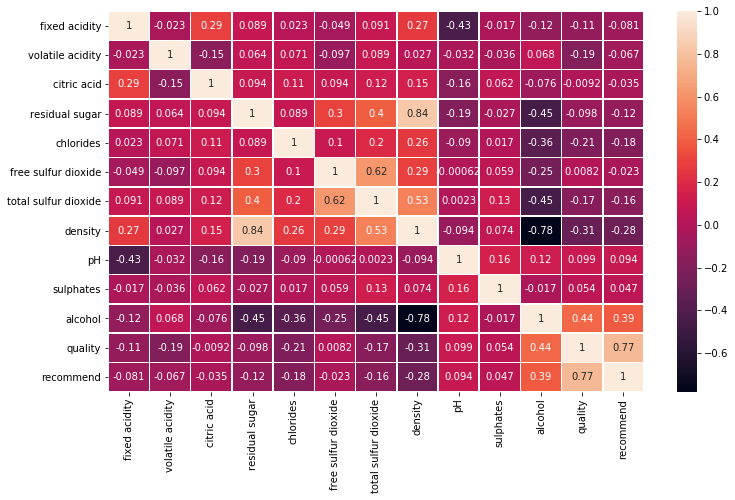

In [4]:
# Heatmap
import seaborn as sns

data_corr = data.corr(method="pearson")

plt.figure(figsize=(12,7))

sns.heatmap(data_corr,annot=True,linewidths=0.5)

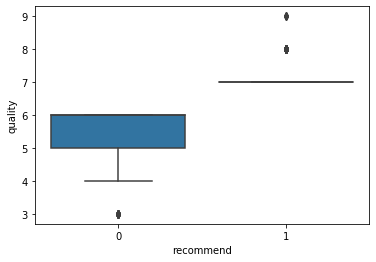

In [5]:
# Boxplot - Quality

sns.boxplot(x=data["recommend"],y=data["quality"])

In [6]:
data = data.drop(['quality'],axis=1)

In [7]:
for feature in data:
    maxim = data[feature].max()
    minim = data[feature].min()
    print(feature,"\n max: ",maxim,"\n min: ",minim)

fixed acidity 
 max:  14.2 
 min:  3.8
volatile acidity 
 max:  1.1 
 min:  0.08
citric acid 
 max:  1.66 
 min:  0.0
residual sugar 
 max:  65.8 
 min:  0.6
chlorides 
 max:  0.34600000000000003 
 min:  0.009000000000000001
free sulfur dioxide 
 max:  289.0 
 min:  2.0
total sulfur dioxide 
 max:  440.0 
 min:  9.0
density 
 max:  1.03898 
 min:  0.98711
pH 
 max:  3.82 
 min:  2.72
sulphates 
 max:  1.08 
 min:  0.22
alcohol 
 max:  14.2 
 min:  8.0
recommend 
 max:  1 
 min:  0


In [8]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data.values)

data_scaled = pd.DataFrame(scaled_features, index=data.index, columns = data.columns)

In [9]:
data_scaled['recommend']=data['recommend']

In [10]:
# SITUATION 1
# Defining X and Y
X = data_scaled.iloc[:,0:-1]
y = data_scaled.iloc[:,-1]

In [11]:
# Setting the models to be used
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, precision_score

models = []

models.append(("LR",LogisticRegression(solver='lbfgs',random_state=0,max_iter=800)))
models.append(("GBC",GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0)))

In [12]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

results = []
model_name = []
f1_values = []
auc_values =[]
precision_scores = []
recall_scores = []

for name, model in models:
    current_model = model.fit(X_train,y_train)
    prediction = current_model.predict(X_test)
    accuracy = accuracy_score(y_test,prediction)
    model_name.append(name)
    results.append(accuracy)
    f1 = f1_score(y_test, prediction)
    f1_values.append(f1)
    auc_value = roc_auc_score(y_test, prediction)
    auc_values.append(auc_value)
    precision = precision_score(y_test, prediction, average='binary')
    precision_scores.append(precision)
    recall = recall_score(y_test, prediction, average='binary')
    recall_scores.append(recall)

In [13]:
df_split = pd.DataFrame()
df_split["Model name"] = model_name
df_split["Accuracy"] = results
df_split["F1 values"] = f1_values
df_split["AUC"] = auc_values
df_split["Precision"] = precision_scores 
df_split["Recall"] = recall_scores

In [14]:
# Using Kfolds to split the data
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

results = []
model_name = []
f1_values = []
auc_values =[]
precision_scores = []
recall_scores = []
splits = []


kf = KFold(n_splits=5)
j=0

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    j+=1

    for name, model in models:
        current_model = model.fit(X_train,y_train)
        prediction = current_model.predict(X_test)
        accuracy = accuracy_score(y_test,prediction)
        model_name.append(name)
        results.append(accuracy)
        f1 = f1_score(y_test, prediction)
        f1_values.append(f1)
        auc_value = roc_auc_score(y_test, prediction)
        auc_values.append(auc_value)
        precision = precision_score(y_test, prediction, average='binary')
        precision_scores.append(precision)
        recall = recall_score(y_test, prediction, average='binary')
        recall_scores.append(recall)
        split = j
        splits.append(split)

In [15]:
df_kfolds = pd.DataFrame()
df_kfolds["Split"] = splits
df_kfolds["Model name"] = model_name
df_kfolds["Accuracy"] = results
df_kfolds["F1 values"] = f1_values
df_kfolds["AUC"] = auc_values
df_kfolds["Precision"] = precision_scores 
df_kfolds["Recall"] = recall_scores

In [16]:
print(pd.DataFrame(df_kfolds))

   Split Model name  Accuracy  F1 values       AUC  Precision    Recall
0      1         LR  0.789796   0.195312  0.551174   0.781250  0.111607
1      1        GBC  0.803061   0.322807  0.592758   0.754098  0.205357
2      2         LR  0.795918   0.180328  0.543817   0.611111  0.105769
3      2        GBC  0.813265   0.371134  0.611025   0.650602  0.259615
4      3         LR  0.831633   0.320988  0.593559   0.696429  0.208556
5      3        GBC  0.837755   0.485437  0.670900   0.614754  0.401070
6      4         LR  0.779367   0.478261  0.651583   0.692308  0.365314
7      4        GBC  0.754852   0.516129  0.667660   0.568889  0.472325
8      5         LR  0.779367   0.353293  0.608634   0.359756  0.347059
9      5        GBC  0.797753   0.487047  0.701069   0.435185  0.552941


In [17]:
print(pd.DataFrame(df_split))

  Model name  Accuracy  F1 values       AUC  Precision    Recall
0         LR  0.738776   0.255814  0.564286   0.687500  0.157143
1        GBC  0.816327   0.594595  0.712857   0.804878  0.471429


In [18]:
df_kfolds.groupby(['Model name']).mean()

Split  Accuracy  F1 values       AUC  Precision    Recall
Model name                                                           
GBC             3  0.801337   0.436511  0.648682   0.604706  0.378262
LR              3  0.795216   0.305636  0.589754   0.628171  0.227661